<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/timeseries5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/data/timeseries5_anomaly.csv",names=['header'])

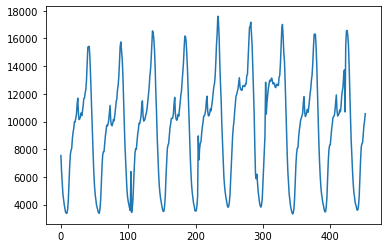

In [8]:
plt.plot(df)

In [14]:
days = df.header.values[:432].reshape(9,-1)

In [20]:
df_days = pd.DataFrame(days).T

In [24]:
col0 = df_days[0]
col1 = df_days[1]
col2 = df_days[2]

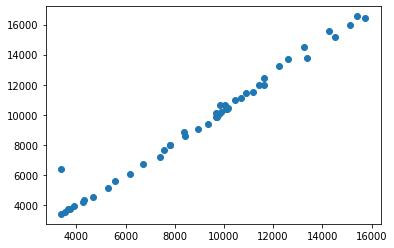

In [25]:
plt.scatter(col1,col2)

In [28]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

In [32]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
y_pred = clf.fit_predict(np.asarray([col1,col2]).T)

In [33]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1])

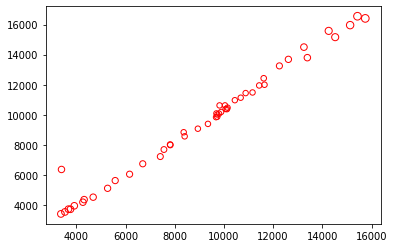

In [37]:
plt.scatter(col1,col2,s=30*np.abs(clf.negative_outlier_factor_),facecolors='none',edgecolors='r')

In [38]:
from sklearn.cluster import DBSCAN

In [44]:
clustering = DBSCAN(eps=1000, min_samples=2).fit(np.asarray([col1,col2]).T)

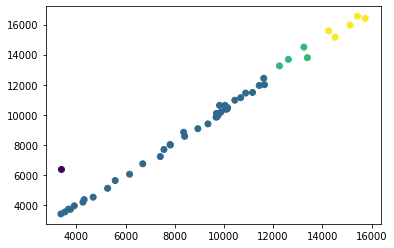

In [45]:
plt.scatter(col1,col2,c=clustering.labels_)

In [46]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  1,  0,  0,  0])

8


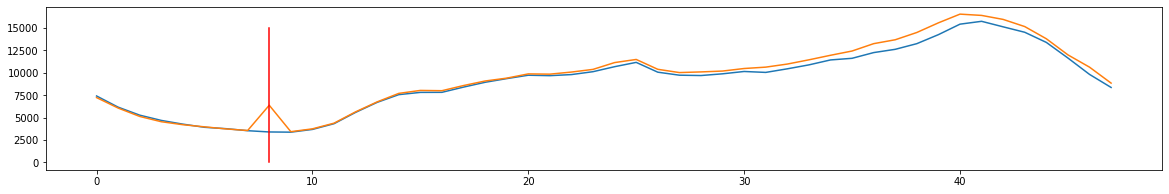

In [51]:
plt.figure(figsize=(20, 3))
plt.plot(col1)
plt.plot(col2)
for  i in range(len(clustering.labels_)):
  if clustering.labels_[i] == -1:
    print(i)
    plt.plot([i,i],[0,15000],'r-')